# <font color = 'ciano'> **Visualização de dados: Base de Dados Íris**</font>

## Bibliotecas

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats.mstats import gmean,hmean
from scipy import stats
import seaborn as sns

## Descrição da base de dados

A base de dados possui 150 instâncias ou amostras distribuidas igualmente entre as três classes que se refere ao tipo de planta íris. O conjunto de dados foi retirado do artigo de Fisher.

São 4 atributos que compõem a base de dados:
- Comprimento da sépala em cm
- Largura da sépala em cm
- Comprimento da pétala em cm
- Largura da pétala em cm

E são rotulados entre 3 classes:
- Iris-Setosa [0]
- Iris-Versicolor [1]
- Iris-Virginica [2]


In [2]:
[AtributoIris, ClasseIris] = load_iris(return_X_y=True)

data_atributos = pd.DataFrame(AtributoIris)
classes_iris = pd.DataFrame(ClasseIris)
data_atributos.columns = ['Comprimento_sepala','Largura_sepala','Comprimento_petala','Largura_petala']

In [3]:
#Redefinindo os rotulos de numéricos para os nomes classes de rosas
classes_iris =  classes_iris.mask(classes_iris == 0, 'Iris-Setosa').mask(classes_iris == 1, 'Iris-Versicolor').mask(classes_iris == 2, 'Iris-Virginica')

#Adicionando o rotulos a base total de dados
data_iris = data_atributos.assign(especie = classes_iris)
data_iris.head()

,Comprimento_sepala,Largura_sepala,Comprimento_petala,Largura_petala,especie
0,5.1,3.5,1.4,0.2,Iris-Setosa
1,4.9,3.0,1.4,0.2,Iris-Setosa
2,4.7,3.2,1.3,0.2,Iris-Setosa
3,4.6,3.1,1.5,0.2,Iris-Setosa
4,5.0,3.6,1.4,0.2,Iris-Setosa


In [4]:
print("Tamanho da base de dados: ",data_atributos.shape)

Tamanho da base de dados:  (150, 4)


In [5]:
data_iris.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Comprimento_sepala  150 non-null    float64
 1   Largura_sepala      150 non-null    float64
 2   Comprimento_petala  150 non-null    float64
 3   Largura_petala      150 non-null    float64
 4   especie             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Pré-processando a base de dados

É possível observar que a base de dados não possui dados faltantes, assim não é necessário imputar valores ou eliminar as colunas nos dados faltantes.

In [6]:
data_iris.isnull().sum()

Comprimento_sepala    0
Largura_sepala        0
Comprimento_petala    0
Largura_petala        0
especie               0
dtype: int64

## Análise estatística dos dados

In [7]:
estatistica = data_atributos.describe()

### Medidas de Têndencia Central

As medidas de tendências centrais são ferramentas que estimam o melhor valor que representa um conjunto de dados. As medidas de tendências centrais utilizadas nesse trabalhos são do tipo: 
- Média Aritmética
- Médiana
- Moda
- Medidas Separatrizes

Para mediar o grau de concentração dos dados é utilizado para cada atributos a visualização das distrubuições das amostras por meio do 
- Histograma 
- Diagrama de Caixas
- Curtose
- Assimetria

#### Curtose

In [8]:
data_atributos.kurtosis()

Comprimento_sepala   -0.552064
Largura_sepala        0.228249
Comprimento_petala   -1.402103
Largura_petala       -1.340604
dtype: float64

#### Assimetria 

In [9]:
data_atributos.skew()

Comprimento_sepala    0.314911
Largura_sepala        0.318966
Comprimento_petala   -0.274884
Largura_petala       -0.102967
dtype: float64

#### Diagrama de Caixas

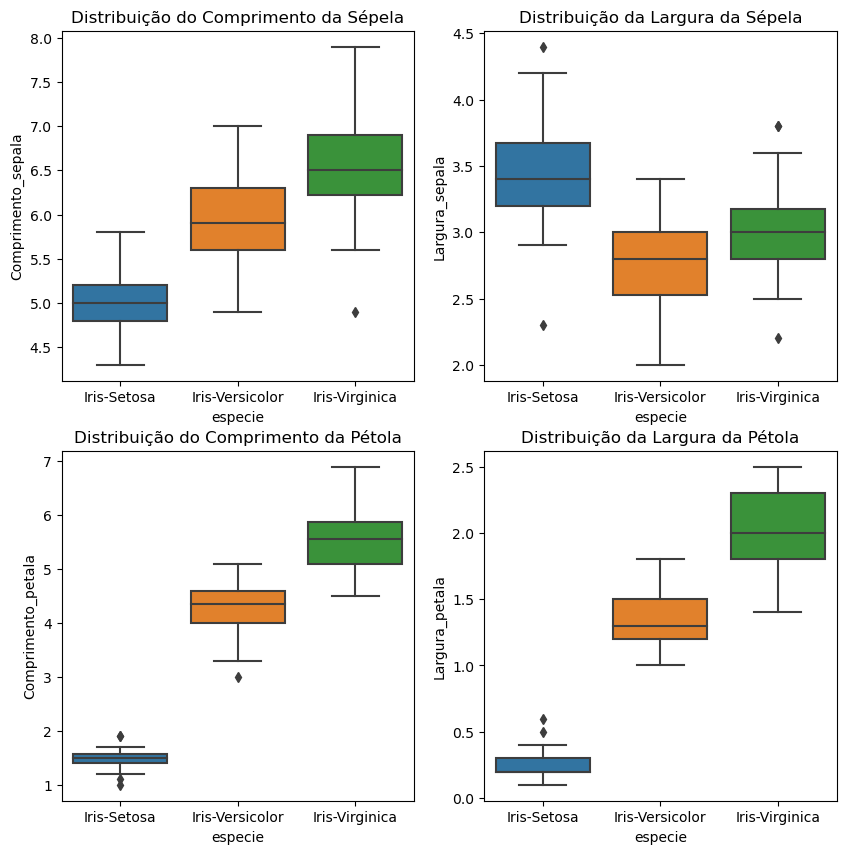

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

sns.boxplot(ax=axs[0][0],data=data_iris,x='especie', y="Comprimento_sepala").set_title("Distribuição do Comprimento da Sépela");
sns.boxplot(ax=axs[0][1],data=data_iris, x='especie',y="Largura_sepala").set_title("Distribuição da Largura da Sépela");
sns.boxplot(ax=axs[1][0],data=data_iris, x='especie',y="Comprimento_petala").set_title("Distribuição do Comprimento da Pétola");
sns.boxplot(ax=axs[1][1],data=data_iris, x='especie',y="Largura_petala").set_title("Distribuição da Largura da Pétola");


A partir da distribuição de diagrama de caixa é possível perceber que o atributo Largura da Sépela possui uma faixa de outliers.

#### Histograma

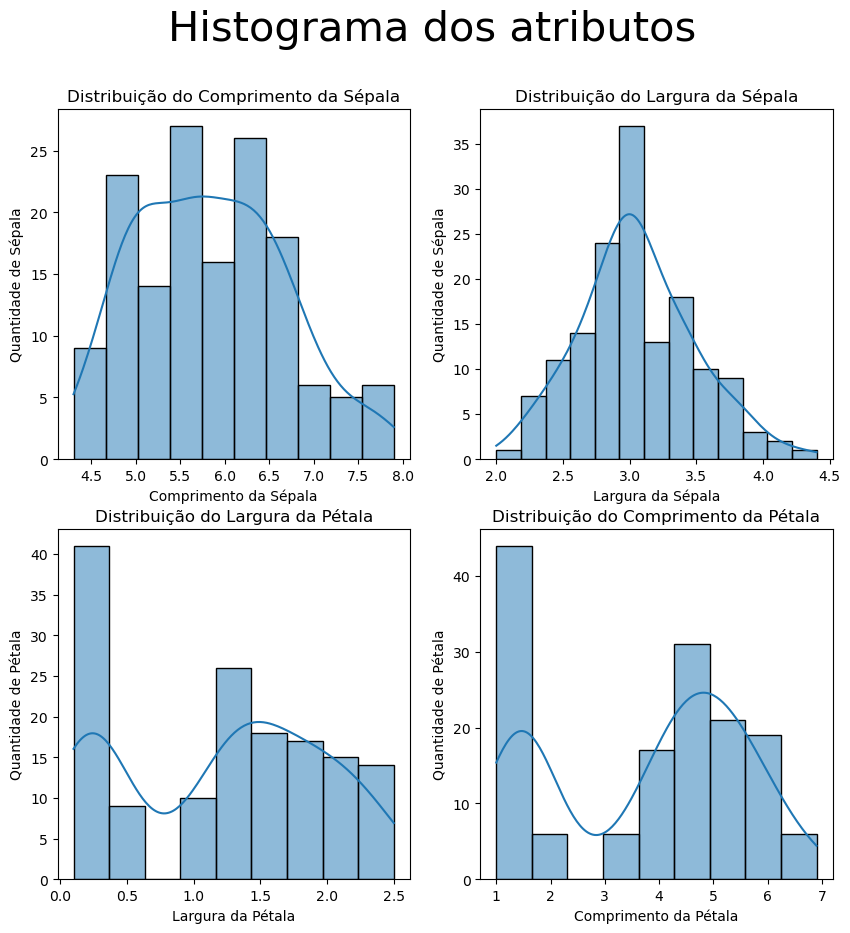

In [11]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
fig.suptitle('Histograma dos atributos', size=30)

sns.histplot(ax = axis[0,0],data=data_atributos,x='Comprimento_sepala', kde=True, bins=10);
axis[0][0].set_title("Distribuição do Comprimento da Sépala");
axis[0][0].set_xlabel('Comprimento da Sépala');
axis[0][0].set_ylabel('Quantidade de Sépala');

sns.histplot(ax = axis[0,1],data=data_atributos,x='Largura_sepala', kde=True);
axis[0][1].set_title("Distribuição do Largura da Sépala");
axis[0][1].set_xlabel('Largura da Sépala');
axis[0][1].set_ylabel('Quantidade de Sépala');

sns.histplot(ax=axis[1,0],data=data_atributos,x='Largura_petala', kde=True);
axis[1][0].set_title("Distribuição do Largura da Pétala");
axis[1][0].set_xlabel('Largura da Pétala');
axis[1][0].set_ylabel('Quantidade de Pétala');

sns.histplot(ax=axis[1,1],data=data_atributos,x='Comprimento_petala', kde=True);
axis[1][1].set_title("Distribuição do Comprimento da Pétala");
axis[1][1].set_xlabel('Comprimento da Pétala');
axis[1][1].set_ylabel('Quantidade de Pétala');


#### Média

In [12]:
estatistica.loc[['mean']]

,Comprimento_sepala,Largura_sepala,Comprimento_petala,Largura_petala
mean,5.843333,3.057333,3.758,1.199333


#### Percentil

In [13]:
estatistica.loc[['25%','50%','75%']]

,Comprimento_sepala,Largura_sepala,Comprimento_petala,Largura_petala
25%,5.1,2.8,1.60,0.3
50%,5.8,3.0,4.35,1.3
75%,6.4,3.3,5.10,1.8


#### Moda

In [14]:
data_atributos.mode()


,Comprimento_sepala,Largura_sepala,Comprimento_petala,Largura_petala
0,5.0,3.0,1.4,0.2
1,NaN,NaN,1.5,NaN


### Medidas de dispersão

As medidas de disperção ou variação permitem saber o grau de dispersão dos dados, em relação a uma medida de tendência central.
- Amplitude
- Variância
- Desvio Padrão
- Coeficiente de Variação
- Covariança
- Correlação

#### Mínimo e Máximo

In [15]:
estatistica.loc[['max','min']]

,Comprimento_sepala,Largura_sepala,Comprimento_petala,Largura_petala
max,7.9,4.4,6.9,2.5
min,4.3,2.0,1.0,0.1


#### Amplitude

In [16]:
data_atributos.max() - data_atributos.min()

Comprimento_sepala    3.6
Largura_sepala        2.4
Comprimento_petala    5.9
Largura_petala        2.4
dtype: float64

#### Desvio Padrão

In [17]:
estatistica.loc[['std']]


,Comprimento_sepala,Largura_sepala,Comprimento_petala,Largura_petala
std,0.828066,0.435866,1.765298,0.762238


#### Variança

In [18]:
data_atributos.var()

Comprimento_sepala    0.685694
Largura_sepala        0.189979
Comprimento_petala    3.116278
Largura_petala        0.581006
dtype: float64

#### Covariança

In [19]:
data_atributos.cov()

,Comprimento_sepala,Largura_sepala,Comprimento_petala,Largura_petala
Comprimento_sepala,0.685694,-0.042434,1.274315,0.516271
Largura_sepala,-0.042434,0.189979,-0.329656,-0.121639
Comprimento_petala,1.274315,-0.329656,3.116278,1.295609
Largura_petala,0.516271,-0.121639,1.295609,0.581006


#### Correlação

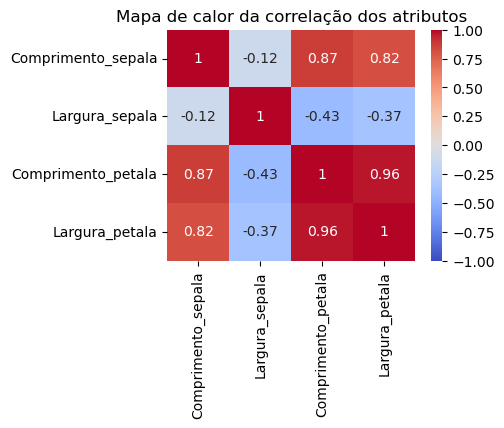

In [20]:
fig, ax = plt.subplots(figsize=(4, 3))
ax = sns.heatmap(data_atributos.corr(method='pearson'),annot=True,vmin=-1,vmax=1,cmap='coolwarm');

# Adicionar um título ao gráfico
ax.set_title("Mapa de calor da correlação dos atributos");



Atráves da matriz de correlação é possível observar que os atributos Comprimento da sépala e Largura da sépala são bem descorrelacionados. 

#### Gráfico de Dispersão

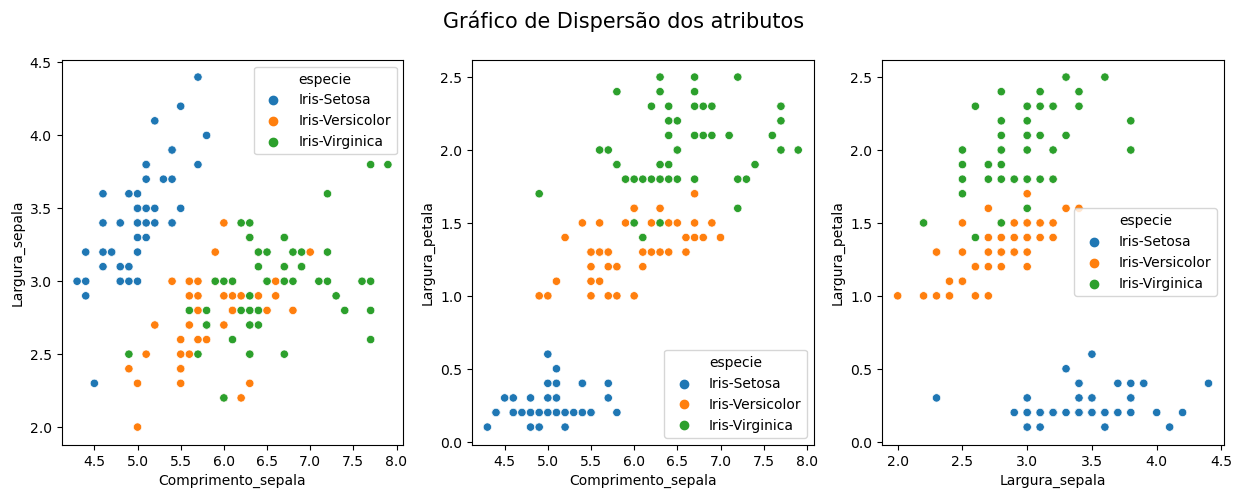

In [21]:
fig, axis = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))
fig.suptitle('Gráfico de Dispersão dos atributos', size=15)
sns.scatterplot(ax=axis[0],data = data_iris, x='Comprimento_sepala',y='Largura_sepala',hue='especie');
sns.scatterplot(ax=axis[1],data = data_iris, x='Comprimento_sepala',y='Largura_petala',hue='especie');
sns.scatterplot(ax=axis[2],data = data_iris, x='Largura_sepala',y='Largura_petala',hue='especie');
